In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('seaborn')
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
test = pd.read_csv('data/aug_test.csv')
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [4]:
train = pd.read_csv('data/aug_train.csv')
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
# train셋 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
# 각 컬럼 정보
list(train.columns)

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [7]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [8]:
# 컬럼명 번역
col_to_kor = {
    'enrollee_id' : '고유ID',
    'city': '도시코드',
    'city_development_index' : '도시개발지수(scaled)',
    'gender': '성별',
    'relevent_experience': '관련경험',
    'enrolled_university': '대학유형(있는 경우)',
    'education_level': '학력',
    'major_discipline' : '전공',
    'experience': '연단위경력',
    'company_size': '현재직장직원수',
    'company_type' : '현재직장고용주유형',
    'last_new_job': '현재직장직전공백기간(년)',
    'training_hours': '교육이수시간',
    'target': '이직희망여부'
}

In [9]:
# 컬럼명 번역 실행
# train.rename(columns=col_to_kor, inplace=True)

In [10]:
# for col in train.columns:
#     print(train[col].isna().sum())
print(train.shape)
train.isna().sum()

(19158, 14)


enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
str_cols = [] # 모든 숫자형 컬럼
int_cols = [] # 모든 범주형 컬럼
all_data = [] # 모든 범주형 데이터 리스트

for col in train.columns:
    if train[col].dtypes == 'object':
        str_cols.append(col)
        for dat in train[col].unique():
            all_data.append(dat)
    else:
        int_cols.append(col)
            
 # 전체 범주형 컬럼 원핫인코딩시 전체 범주형 컬럼개수
print(all_data, '\n\n전체 컬럼개수', len(all_data))

['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83', 'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93', 'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19', 'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97', 'city_50', 'city_138', 'city_82', 'city_157', 'city_89', 'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59', 'city_165', 'city_145', 'city_142', 'city_26', 'city_12', 'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149', 'city_10', 'city_45', 'city_80', 'city_128', 'city_158', 'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78', 'city_109', 'city_24', 'city_134', 'city_48', 'city_144', 'city_91', 'city_146', 'city_133', 'city_126', 'city_118', 'city_9', 'city_167', 'city_27', 'city_84', 'city_54', 'city_3

In [12]:
str_cols

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [13]:
int_cols

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [14]:
train.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [15]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [17]:
train[train['company_size'].isna()&train['company_type'].isna()].loc[:,'company_size':'training_hours']

,company_size,company_type,last_new_job,training_hours
0,NaN,NaN,1,36
2,NaN,NaN,never,83
5,NaN,NaN,1,24
10,NaN,NaN,never,32
13,NaN,NaN,never,24
...,...,...,...,...
19144,NaN,NaN,never,48
19151,NaN,NaN,1,60
19153,NaN,NaN,1,42
19154,NaN,NaN,4,52


In [19]:
# 컬럼별 고유값 개수
for col in train.columns:
    print(f'{col}', train[col].unique().size)

enrollee_id 19158
city 123
city_development_index 93
gender 4
relevent_experience 2
enrolled_university 4
education_level 6
major_discipline 7
experience 23
company_size 9
company_type 7
last_new_job 7
training_hours 241
target 2


## 숫자형 컬럼

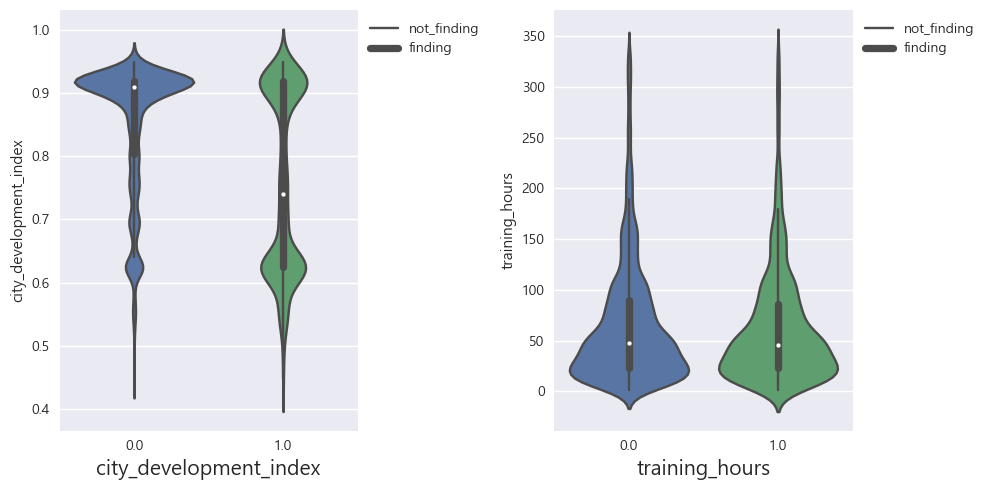

In [234]:
# sns.boxplot(y=col, x='')
int_cols_toplot = int_cols[1:3] # 고유ID, 이직희망여부는 시각화 필요x
fig, axes = plt.subplots(nrows=1, ncols=len(int_cols_toplot), figsize=(10,5))

for idx, i in enumerate(int_cols_toplot):
    sns.violinplot(x='target', y=i, data=train, ax=axes[idx])
    axes[idx].set_xlabel(i, fontsize=15)
    axes[idx].legend(['not_finding', 'finding'], bbox_to_anchor=(1,1), loc='upper left')
    
plt.tight_layout()
plt.show()    

In [235]:
int_cols_toplot

['city_development_index', 'training_hours']

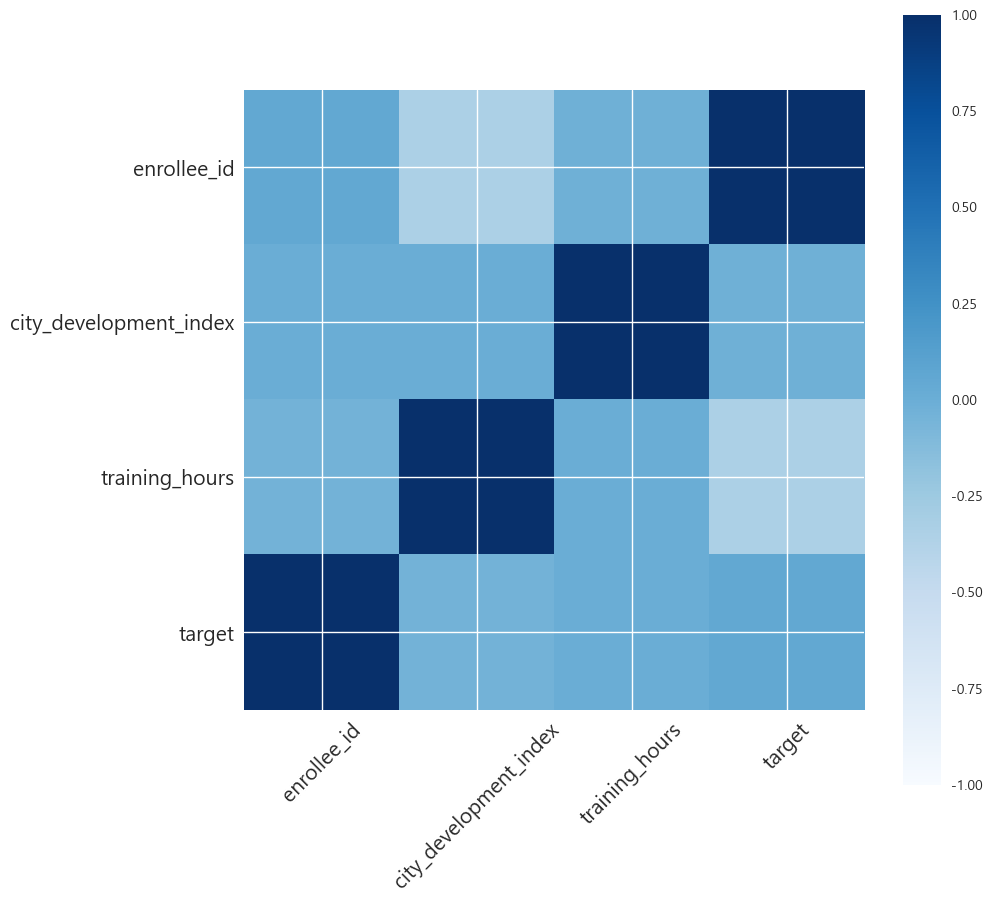

In [236]:
# 숫자형 컬럼간의 상관관계 => 서로의 상관관계는 그닥
to_corr = train[int_cols]
corr = to_corr.corr()
plt.figure(figsize=(10,10))
plt.imshow(corr.loc[corr.columns[::-1]], cmap='Blues', vmin=-1, vmax=1)

plt.xticks(ticks=range(to_corr.columns.size), labels=to_corr.columns,\
           rotation=45, fontsize=15)
plt.yticks(ticks=range(to_corr.columns.size), labels=to_corr.columns, \
          fontsize=15)

plt.colorbar()
plt.show()

# 1st try: 널값에 최빈값 넣고 시각화

In [237]:
def nul_churi(H_P_0=500, H_P_1='mode'):
    how_to_left = ['mode','max','mean','median']
    class InvalidModeError(Exception):
        def __init__(self, invalid_mode):
            self.invalid_mode = invalid_mode
        def __str__(self):
            return f"{self.invalid_mode} - 사용할 수 없는 모드입니다. 'mode','max','mean','median'만 가능합니다."
        
    if type(H_P_0) != int and H_P_1 not in how_to_left:
        raise InvalidModeError(mode)
        
    drop_list = []
    for col in train.columns:
        if 1 < train[col].isna().sum() <= H_P_0:
            drop_list.append(col)
    train.dropna(subset=drop_list, inplace=True)
    
    for col in train.columns:
        if train[col].isna().sum():
            if H_P_1=='mode':
                train.loc[train[col].isna(), col] = train[col].mode()[0]
            elif H_P_1=='max':
                train.loc[train[col].isna(), col] = train[col].max()[0]
            elif H_P_1=='mean':
                train.loc[train[col].isna(), col] = train[col].mean()[0]
            elif H_P_1=='median':
                train.loc[train[col].isna(), col] = train[col].median()[0]

In [238]:
nul_churi(0,'mode')

In [239]:
# 최빈값 제대로 들어갔는지 확인
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [240]:
train.shape

(19158, 14)

In [241]:
# 븐류하여 상관성을 시각화할 범주형 컬럼들
print(len(str_cols),'개')
str_cols

10 개


['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [242]:
str_cols_toplot = str_cols[1:]
str_cols_toplot
# train['도시코드'].value_counts()
# train.columns

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

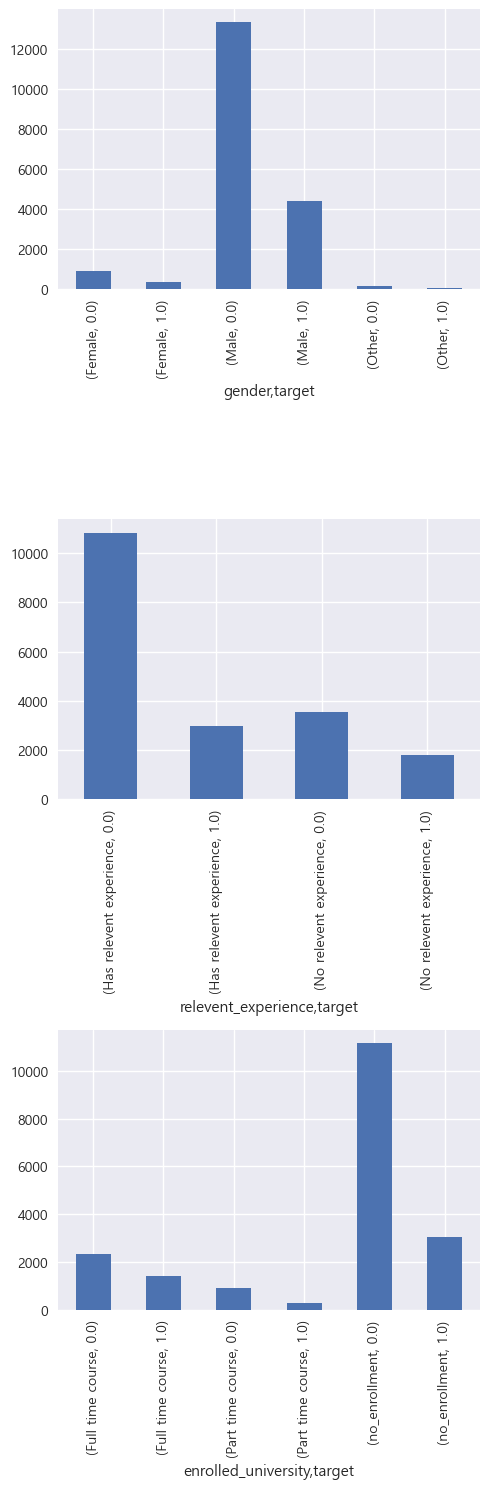

In [243]:
n = 1 # 몇 열로 나누어 그릴건지
str_cols_0 = str_cols[1:4]
fig, axes = plt.subplots(nrows=len(str_cols_0)//n, ncols=n, figsize=(5,15))

for idx, i in enumerate(str_cols_0):
    train.groupby([i,'target'])['target'].count().plot(kind='bar',ax=axes[idx])
    
plt.tight_layout()
plt.show()

In [244]:
str_cols_0

['gender', 'relevent_experience', 'enrolled_university']

0
1
2


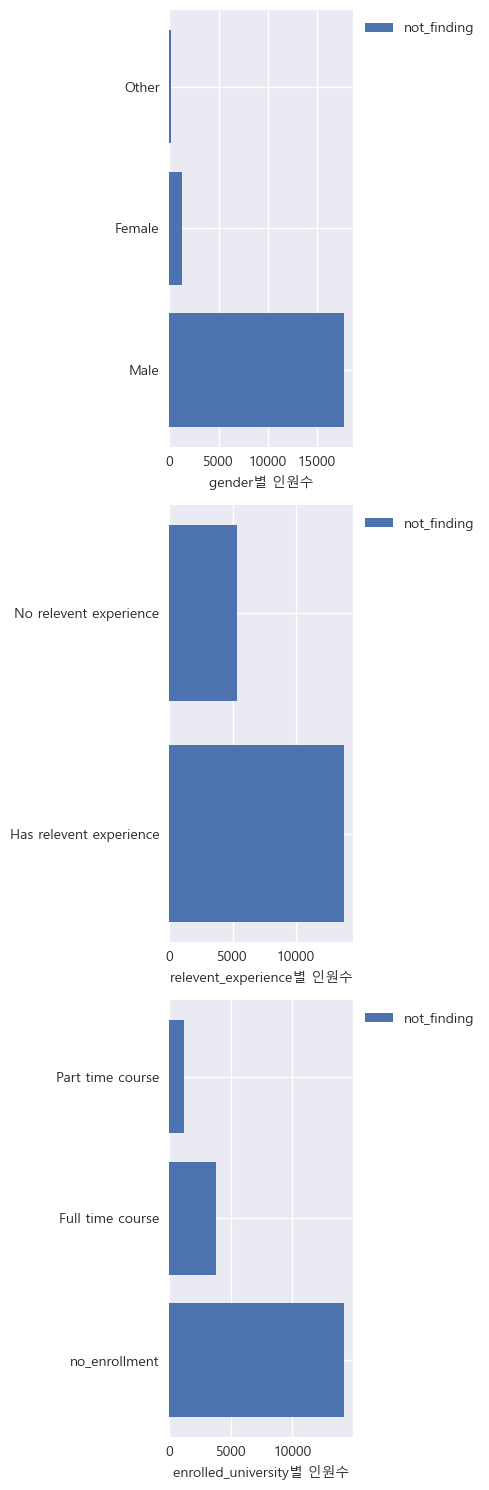

In [245]:
fig, axes = plt.subplots(nrows=len(str_cols_0)//n, ncols=n, figsize=(5,15))

for idx, i in enumerate(str_cols_0):
    print(idx)
#     sns.countplot(x=i, data=train, ax=axes[idx//n,idx%n])
#     axes[idx//n,idx%n].barh(train[i].value_counts().index,
#                              train[i].value_counts().values)
#     axes[idx//n,idx%n].set_ylabel(i+'별 인원수', fontsize=10)
#     axes[idx//n,idx%n].legend(['이직미희망', '이직희망'], bbox_to_anchor=(1,1), loc='upper left')
    axes[idx].barh(train[i].value_counts().index,
                             train[i].value_counts().values)
    axes[idx].set_xlabel(i+'별 인원수', fontsize=10)
#     axes[idx%n].set_xticklabels(train[i].value_counts().index,rotation=90)
    axes[idx].legend(['not_finding', 'finding'], bbox_to_anchor=(1,1), loc='upper left')

plt.tight_layout()
plt.show()

## 원핫인코딩

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [247]:
ohe_columns = []
lb_columns = []
else_columns = []
for i in train.columns:
    if train[i].dtypes=='object' and i != 'city':
        ohe_columns.append(i)
    elif i == 'city':
        lb_columns.append(i)
    else:
        else_columns.append(i)
encoding_columns
# else_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [248]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(train[ohe_columns])
X.shape
# ohe.get_feature_names()

(19158, 61)

In [249]:
X_df = pd.DataFrame(X, columns=ohe.get_feature_names())

X_df['city'] = LabelEncoder().fit_transform(train['city'])

# 원핫인코딩시 미처리된 컬럼들 추가
for i in else_columns:
    X_df[i] = train[i].values
X_df.head()

,x0_Female,x0_Male,x0_Other,x1_Has relevent experience,x1_No relevent experience,x2_Full time course,x2_Part time course,x2_no_enrollment,x3_Graduate,x3_High School,...,x8_2,x8_3,x8_4,x8_>4,x8_never,city,enrollee_id,city_development_index,training_hours,target
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5,8949,0.920,36,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,77,29725,0.776,47,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,64,11561,0.624,83,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,14,33241,0.789,52,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,50,666,0.767,8,0.0


## 현재까지 전처리된 DF 저장

In [250]:
X_df.isna().sum() # 확인후

x0_Female                     0
x0_Male                       0
x0_Other                      0
x1_Has relevent experience    0
x1_No relevent experience     0
                             ..
city                          0
enrollee_id                   0
city_development_index        0
training_hours                0
target                        0
Length: 66, dtype: int64

In [251]:
X_df.to_csv('data/nul_to_mode.csv',index=False)